In [2]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import skimage as ski
from skimage.io import imread
import numpy as np
import keras as keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
import skimage as ski
from skimage.viewer import ImageViewer
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from pathlib import Path  
import seaborn as sb
from keras import regularizers

# preparation
define some functions

In [3]:
def getDifferenceImage(image1, image2):
    '''
This is a function that utilizes skimage to compare two images
The inputs for this would be the mosquito movie
It returns the difference between two images
    '''
    import skimage as ski

    diffimage = ski.util.compare_images(image1, image2, method='diff')
    return diffimage

In [4]:
def getthediffimg(moviename):
    '''
takes moviename, calculates the difference between two images
and returns a pandas dataframe with
    row, col, sum, image
'''
    # read in the moviename
    mov = imread(moviename)
    mov = ski.img_as_float(mov)

    #getdiffimage
    if len(mov) > 29:
        diffImage = getDifferenceImage(mov[0], mov[29])
#        print(diffImage)
    else:
        print("not enough images")
 
    #normalize to the highest value in the movie 
    diffImage/=diffImage.max()
    
    # threshold
    mov_threshold = diffImage>diffImage.mean()+3*diffImage.std()
 
    # get the rows and columns
    cols = np.array_split(diffImage,12,1)
    rows = [np.array_split(x,8,0) for x in cols]
    
    # and for threshold
    cols_threshold = np.array_split(mov_threshold,12,1)
    rows_threshold = [np.array_split(x,8,0) for x in cols_threshold]
    
 
    # create the output variable
    out = []
    for r in np.arange(8):
        for c in np.arange(12):
            out.append([r, c, rows[c][r].sum(), rows[c][r]])
            #out.append([r, c, rows[c][r].sum())
            #out[r,c]=rows[c][r].sum()
    out = pd.DataFrame(out, columns=['row', 'col', 'image_sum','diffimg'])
    return out, diffImage
 
def makeDiffDataset(moviename, csvfilename):
    '''
get the difference image dataframe using getthediffimg, then 
merge it with the index in csvfilename.
csvfilename must be zero - indexed
'''
    import pandas as pd
    import numpy as np
 
    # get the diff dataframe
    vardata = getthediffimg(moviename)
 
    # merge with csvfilename
    return vardata[0].merge(pd.read_csv(csvfilename))
 


Change name to get diff for movie

In [5]:
# aggregate the files
'''
This uploads the datafiles for the new data frame and training using 
glob - to return all filepaths with the same name
'''
datafiles = glob.glob('/Users/sri28/Desktop/Academic/QMULYR3/BMD600 - Biomed Research Project/Trainingsets/160*8/60min drug*/*tif')
datafiles

['/Users/sri28/Desktop/Academic/QMULYR3/BMD600 - Biomed Research Project/Trainingsets/160128/60min drug 10ms 5/60min drug 10ms 5_MMStack.ome.tif',
 '/Users/sri28/Desktop/Academic/QMULYR3/BMD600 - Biomed Research Project/Trainingsets/160128/60min drug 10ms 2/60min drug 10ms 2_MMStack.ome.tif',
 '/Users/sri28/Desktop/Academic/QMULYR3/BMD600 - Biomed Research Project/Trainingsets/160128/60min drug 10ms 3/60min drug 10ms 3_MMStack.ome.tif',
 '/Users/sri28/Desktop/Academic/QMULYR3/BMD600 - Biomed Research Project/Trainingsets/160128/60min drug 10ms 4/60min drug 10ms 4_MMStack.ome.tif',
 '/Users/sri28/Desktop/Academic/QMULYR3/BMD600 - Biomed Research Project/Trainingsets/160128/60min drug 10ms 1/60min drug 10ms 1_MMStack.ome.tif',
 '/Users/sri28/Desktop/Academic/QMULYR3/BMD600 - Biomed Research Project/Trainingsets/160218/60min drug 10ms 5/60min drug 10ms 5_MMStack.ome.tif',
 '/Users/sri28/Desktop/Academic/QMULYR3/BMD600 - Biomed Research Project/Trainingsets/160218/60min drug 10ms 2/60min d

In [9]:
'''
CSV for dataframe uploaded here
'''
csvfile = '/Users/sri28/Desktop/Academic/QMULYR3/BMD600 - Biomed Research Project/BMD600_Mov/160122/conditions.csv'
csvfile

'/Users/sri28/Desktop/Academic/QMULYR3/BMD600 - Biomed Research Project/BMD600_Mov/160122/conditions.csv'

In [10]:
'''
To check the number of mosquito movies returned
'''
print (len(datafiles))

10


In [11]:
'''
Dataframe creation
'''
x=[]
for datafile in datafiles:
    print('doing{}'.format(datafile))
    x.append(makeDiffDataset(datafile, csvfile))
x = pd.concat(x)

doing/Users/sri28/Desktop/Academic/QMULYR3/BMD600 - Biomed Research Project/Trainingsets/160128/60min drug 10ms 5/60min drug 10ms 5_MMStack.ome.tif
doing/Users/sri28/Desktop/Academic/QMULYR3/BMD600 - Biomed Research Project/Trainingsets/160128/60min drug 10ms 2/60min drug 10ms 2_MMStack.ome.tif
doing/Users/sri28/Desktop/Academic/QMULYR3/BMD600 - Biomed Research Project/Trainingsets/160128/60min drug 10ms 3/60min drug 10ms 3_MMStack.ome.tif
doing/Users/sri28/Desktop/Academic/QMULYR3/BMD600 - Biomed Research Project/Trainingsets/160128/60min drug 10ms 4/60min drug 10ms 4_MMStack.ome.tif
doing/Users/sri28/Desktop/Academic/QMULYR3/BMD600 - Biomed Research Project/Trainingsets/160128/60min drug 10ms 1/60min drug 10ms 1_MMStack.ome.tif
doing/Users/sri28/Desktop/Academic/QMULYR3/BMD600 - Biomed Research Project/Trainingsets/160218/60min drug 10ms 5/60min drug 10ms 5_MMStack.ome.tif
doing/Users/sri28/Desktop/Academic/QMULYR3/BMD600 - Biomed Research Project/Trainingsets/160218/60min drug 10ms 

In [12]:
'''
To view and check the dataframe created 
'''
print(x)

    row  col    image_sum                                            diffimg  \
0     0    3   616.585179  [[0.01860674736028849, 0.03895184135977347, 0....   
1     0    4   580.609258  [[0.02523821787277869, 0.010043780582024172, 0...   
2     0    5   584.278972  [[0.03573268091681689, 0.05041205253669848, 0....   
3     0    6  2167.445661  [[0.026590265258820522, 0.03708472830285872, 0...   
4     0    7   815.328676  [[0.04764357455575593, 0.016932783929951126, 0...   
..  ...  ...          ...                                                ...   
43    7    4  1075.954353  [[0.0015072130912222724, 0.00882796239144487, ...   
44    7    5  1087.097251  [[0.0015072130912222724, 0.009043278547333635,...   
45    7    6  1488.038039  [[0.015861623483815476, 0.007607837508074328, ...   
46    7    7  1151.439819  [[0.014928586808296795, 0.00882796239144474, 0...   
47    7    8   636.148496  [[0.005311131845259436, 0.00014354410392593072...   

            cmpd          conc genotype

lets test model

In [13]:
'''
create labels dead alive
idx = (x['conc']>1e-7
x['alive'] = 1 # 1 means alive, start by labelling them all as alive then override
keep x for reference later, here we will pull out the labelled rows 
(dead|alive) and put them into another variable
'''
idx_dead = (x['conc']>1e-7) & (x['cmpd']=='Deltamethrin')
idx_alive = (x['cmpd']=='DMSO')
x.loc[idx_dead,'alive'] = 0 
x.loc[idx_alive,'alive'] = 1
idx = idx_dead | idx_alive
x_pruned = x.loc[idx]
x_pruned.head(7)

,row,col,image_sum,diffimg,cmpd,conc,genotype,alive
0,0,3,616.585179,"[[0.01860674736028849, 0.03895184135977347, 0....",DMSO,0.000000,T,1.0
1,0,4,580.609258,"[[0.02523821787277869, 0.010043780582024172, 0...",Deltamethrin,0.000010,T,0.0
3,0,6,2167.445661,"[[0.026590265258820522, 0.03708472830285872, 0...",DMSO,0.000000,G,1.0
4,0,7,815.328676,"[[0.04764357455575593, 0.016932783929951126, 0...",Deltamethrin,0.000010,G,0.0
6,1,3,1095.668555,"[[0.020087561164048345, 0.008434200360546058, ...",DMSO,0.000000,T,1.0
7,1,4,570.115632,"[[0.0034766932783931, 0.008562966778264198, 0....",Deltamethrin,0.000002,T,0.0
9,1,6,1847.116405,"[[0.016417718259077976, 0.013262941024980638, ...",DMSO,0.000000,G,1.0


In [14]:
'''
To view and check the dataframe  
'''
print(idx)

0      True
1      True
2     False
3      True
4      True
      ...  
43    False
44    False
45     True
46    False
47    False
Length: 480, dtype: bool


In [15]:
'''
To verify type of dataframe
'''
type(x)

pandas.core.frame.DataFrame

In [16]:
'''
To view and check the dataframe  
'''
print(idx_dead)

0     False
1      True
2     False
3     False
4      True
      ...  
43    False
44    False
45    False
46    False
47    False
Length: 480, dtype: bool


In [17]:
'''
To view and check the dataframe  
'''
print(idx_alive)

0      True
1     False
2     False
3      True
4     False
      ...  
43    False
44    False
45     True
46    False
47    False
Name: cmpd, Length: 480, dtype: bool


In [18]:
'''
#keep x for reference later, here we will pull out the labelled rows 
(dead|alive) and put them into another variable
x_pruned creates new frame for neural network with only deltamethrin
'''
x_pruned = x.loc[x['cmpd']=='Deltamethrin']
x_pruned.head(7)

,row,col,image_sum,diffimg,cmpd,conc,genotype,alive
1,0,4,580.609258,"[[0.02523821787277869, 0.010043780582024172, 0...",Deltamethrin,1.000000e-05,T,0.0
4,0,7,815.328676,"[[0.04764357455575593, 0.016932783929951126, 0...",Deltamethrin,1.000000e-05,G,0.0
7,1,4,570.115632,"[[0.0034766932783931, 0.008562966778264198, 0....",Deltamethrin,2.000000e-06,T,0.0
10,1,7,985.629668,"[[0.003541076487252112, 0.013842389904712803, ...",Deltamethrin,2.000000e-06,G,0.0
13,2,4,656.855846,"[[0.0037342261138295003, 0.01879989698686576, ...",Deltamethrin,4.000000e-07,T,0.0
16,2,7,735.116598,"[[0.01506567087303626, 0.0036698429049703708, ...",Deltamethrin,4.000000e-07,G,0.0
19,3,4,589.852627,"[[0.01030131341746069, 0.003541076487252112, 0...",Deltamethrin,8.000000e-08,T,NaN


In [20]:
'''
to verify length of x_pruned 
'''
print (len(x_pruned))

160


In [21]:
'''
# get the images - and create x and y for training
# X train is used to trim all images to train on to 200 x 200
# y labels is the correct answers - concentration

'''
images = x_pruned['diffimg']

x_train = [im[:200,:200] for im in images.to_list()] 

y_labels = x_pruned['conc'] 


In [22]:
'''
to verify y_labels
'''
y_labels

1     1.000000e-05
4     1.000000e-05
7     2.000000e-06
10    2.000000e-06
13    4.000000e-07
          ...     
34    3.200000e-09
37    6.400000e-10
40    6.400000e-10
43    1.280000e-10
46    1.280000e-10
Name: conc, Length: 160, dtype: float64

In [18]:
'''
Make sure images have shape (200,200,1)
'''
x_train = np.expand_dims(x_train, -1)


In [19]:
'''
Concentration in log to the base 10
'''
y_train = np.log10(y_labels)


In [20]:
'''
to verify y train
'''
y_train

1    -5.00000
4    -5.00000
7    -5.69897
10   -5.69897
13   -6.39794
       ...   
34   -8.49485
37   -9.19382
40   -9.19382
43   -9.89279
46   -9.89279
Name: conc, Length: 160, dtype: float64

In [21]:
'''
Layers to build the network
'''
model = keras.Sequential(
    [
        keras.Input(shape=(200,200,1)),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        #keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu", kernel_regularizer=regularizers.l2(0.01)),
        #keras.layers.Normalization(),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        #keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu", kernel_regularizer=regularizers.l2(0.01)),
        #keras.layers.Normalization(),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        #keras.layers.Normalization(),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(1),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 147456)            0         
                                                                 
 dropout (Dropout)           (None, 147456)            0

In [22]:
#from keras.callbacks import EarlyStopping

#EarlyStopping(monitor='val_err', patience=15)

In [23]:
'''
model compilation
'''
epochs = 24
model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_squared_error"])

In [24]:
#reduce = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=20, mode='auto')
#early = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=30, mode='auto')
#model.fit(X, Y, callbacks=[reduce, early])

In [25]:
hist = model.fit(x_train, y_train,  epochs=24, validation_split=0.1)

Epoch 1/24
5/5 [==============================] - 3s 493ms/step - loss: 38.4792 - mean_squared_error: 38.4792 - val_loss: 5.1360 - val_mean_squared_error: 5.1360
Epoch 2/24
5/5 [==============================] - 2s 474ms/step - loss: 10.6761 - mean_squared_error: 10.6761 - val_loss: 1.8430 - val_mean_squared_error: 1.8430
Epoch 3/24
5/5 [==============================] - 2s 470ms/step - loss: 7.7668 - mean_squared_error: 7.7668 - val_loss: 6.1316 - val_mean_squared_error: 6.1316
Epoch 4/24
5/5 [==============================] - 2s 467ms/step - loss: 4.8754 - mean_squared_error: 4.8754 - val_loss: 4.9204 - val_mean_squared_error: 4.9204
Epoch 5/24
5/5 [==============================] - 2s 471ms/step - loss: 4.6986 - mean_squared_error: 4.6986 - val_loss: 2.7774 - val_mean_squared_error: 2.7774
Epoch 6/24
5/5 [==============================] - 2s 471ms/step - loss: 2.5086 - mean_squared_error: 2.5086 - val_loss: 2.3958 - val_mean_squared_error: 2.3958
Epoch 7/24
5/5 [====================

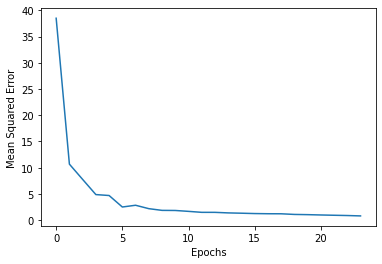

In [26]:
'''
to get the graphs on the performance of the model
'''
plt.plot(hist.history['mean_squared_error'])
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.savefig('/Users/sri28/Desktop/G1.jpeg', dpi = 1000, transparent = True)

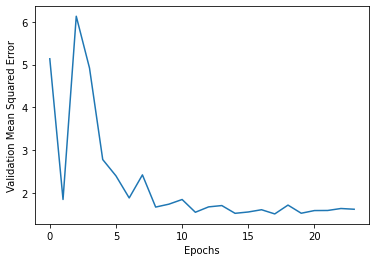

In [27]:
'''
to get the graphs on the performance of the model
'''
plt.plot(hist.history['val_mean_squared_error'])
plt.xlabel('Epochs')
plt.ylabel('Validation Mean Squared Error')
plt.savefig('/Users/sri28/Desktop/G2.jpeg', dpi = 1000, transparent = True)

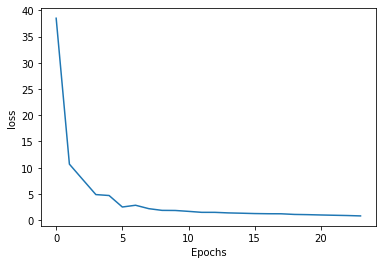

In [28]:
'''
to get the graphs on the performance of the model
'''
plt.plot(hist.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.savefig('/Users/sri28/Desktop/G3.jpeg', dpi = 1000, transparent = True)

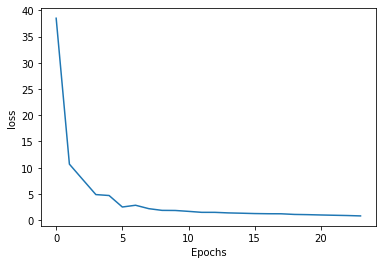

In [29]:
plt.plot(hist.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.savefig('/Users/sri28/Desktop/G3.jpeg', dpi = 1000, transparent = True)

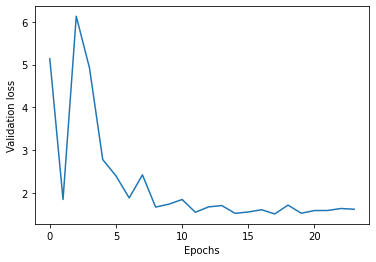

In [30]:
'''
to get the graphs on the performance of the model
'''
plt.plot(hist.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.savefig('/Users/sri28/Desktop/G4.jpeg', dpi = 1000, transparent = True)

In [31]:
'''
This tests the model on an unseen dataset
To predict insecticide concentrations
'''

datafiles = glob.glob('/Users/sri28/Desktop/Academic/QMULYR3/BMD600 - Biomed Research Project/BMD600_Mov/160204/10ms 45min 4/10ms 45min 4_MMStack.ome.tif'
)
datafiles

x_test=[]
for datafile in datafiles:
    print('doing{}'.format(datafile))
    x_test.append(makeDiffDataset(datafile, csvfile))
    
x_test = pd.concat(x_test)
x_test = x_test.loc[x_test['cmpd']=='Deltamethrin']
x_test_imgs = x_test['diffimg']
y_test_conc = np.log10(x_test['conc'])


# trim all to 200 x 200
x_test_imgs = [im[:200,:200] for im in x_test_imgs.to_list()] # these are the images to train on
x_test_imgs = np.expand_dims(x_test_imgs, -1)
#x_test_imgs.shape
y_test_conc

doing/Users/sri28/Desktop/Academic/QMULYR3/BMD600 - Biomed Research Project/BMD600_Mov/160204/10ms 45min 4/10ms 45min 4_MMStack.ome.tif


1    -5.00000
4    -5.00000
7    -5.69897
10   -5.69897
13   -6.39794
16   -6.39794
19   -7.09691
22   -7.09691
25   -7.79588
28   -7.79588
31   -8.49485
34   -8.49485
37   -9.19382
40   -9.19382
43   -9.89279
46   -9.89279
Name: conc, dtype: float64

In [32]:
#x_test_imgs.shape, y_test_conc.shape, result.shape

       True  Predicted
1  -5.00000  -5.999741
4  -5.00000  -6.440063
7  -5.69897  -6.161595
10 -5.69897  -5.838235
13 -6.39794  -6.199793
..      ...        ...
34 -8.49485  -7.783286
37 -9.19382  -7.036361
40 -9.19382 -11.235484
43 -9.89279  -7.737029
46 -9.89279  -7.681044

[160 rows x 2 columns]
       True  Predicted
1  -5.00000  -6.175719
4  -5.00000  -6.213553
7  -5.69897  -6.377484
10 -5.69897  -6.170868
13 -6.39794  -6.476755
16 -6.39794  -6.789479
19 -7.09691  -6.733582
22 -7.09691  -6.731490
25 -7.79588  -6.664968
28 -7.79588  -6.584036
31 -8.49485  -6.582833
34 -8.49485  -6.898907
37 -9.19382  -6.579820
40 -9.19382  -6.943566
43 -9.89279  -7.125530
46 -9.89279  -6.303982


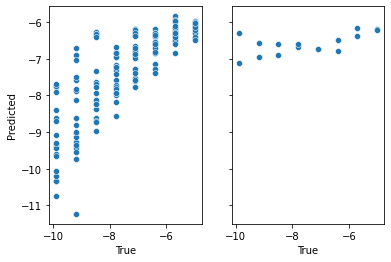

In [33]:
'''
To get true versus predicted values and a graphical representation
'''
fig,ax = plt.subplots(1,2, sharey=True)
result = model.predict(x_train)
result = result.flatten()
out = pd.DataFrame()
out['True']=y_train
out['Predicted']= result
print(out)
sb.scatterplot(data=out, x='True', y='Predicted', ax=ax[0])
result = model.predict(x_test_imgs)
result = result.flatten()
out = pd.DataFrame()
out['True']=y_test_conc
out['Predicted']= result
print(out)
sb.scatterplot(data=out, x='True', y='Predicted', ax=ax[1])
plt.savefig('/Users/sri28/Desktop/EasySamseaborn.jpeg', dpi = 1000, transparent = True)

In [34]:
'''
To save file
'''
filepath = Path('/Users/sri28/Desktop/difficulttest.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
out.to_csv(filepath) 

       True  Predicted
1  -5.00000  -6.175719
4  -5.00000  -6.213553
7  -5.69897  -6.377484
10 -5.69897  -6.170868
13 -6.39794  -6.476755
16 -6.39794  -6.789479
19 -7.09691  -6.733582
22 -7.09691  -6.731490
25 -7.79588  -6.664968
28 -7.79588  -6.584036
31 -8.49485  -6.582833
34 -8.49485  -6.898907
37 -9.19382  -6.579820
40 -9.19382  -6.943566
43 -9.89279  -7.125530
46 -9.89279  -6.303982


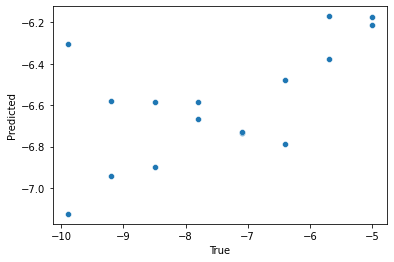

In [35]:
'''
Graphical representation for data
'''
result = model.predict(x_test_imgs)
result = result.flatten()
out = pd.DataFrame()
out['True']=y_test_conc
out['Predicted']= result
print(out)
sb.scatterplot(data=out, x='True', y='Predicted')
plt.savefig('/Users/sri28/Desktop/Easysbscatter.jpeg', dpi = 1000, transparent = True)

In [36]:
#result2 = result[:,0]<result[:,1]

In [37]:
#print(result2)
print(result)

[-6.1757193 -6.2135534 -6.377484  -6.1708684 -6.476755  -6.789479
 -6.7335815 -6.73149   -6.6649685 -6.584036  -6.5828333 -6.8989067
 -6.57982   -6.9435663 -7.1255302 -6.303982 ]


In [38]:
#x_test['is alive'] = result2
#xtest['result']=result2
#xtest
#x_test['result'] 
#filepath = Path('/Users/sri28/Desktop/JUANTEST/out2.csv')  
#filepath.parent.mkdir(parents=True, exist_ok=True)  
#result.to_csv(filepath)  

In [39]:
#x_test['is alive'] = result2
#xtest['result']=result2
#xtest
#from pathlib import Path  
#filepath = Path('/Users/sri28/Desktop/JUANTEST/out2.csv')  
#filepath.parent.mkdir(parents=True, exist_ok=True)  
#x_test.to_csv(filepath)  

In [40]:
result.shape

(16,)

In [41]:
x_test

,row,col,image_sum,diffimg,cmpd,conc,genotype
1,0,4,563.177933,"[[0.04573043984368504, 0.047559657437432436, 0...",Deltamethrin,1.000000e-05,T
4,0,7,595.377151,"[[0.03309220919597576, 0.03508771929824565, 0....",Deltamethrin,1.000000e-05,G
7,1,4,608.333333,"[[0.0062359690695933945, 0.015382057038330371,...",Deltamethrin,2.000000e-06,T
10,1,7,634.229317,"[[0.010809013053961883, 0.01313710817327675, 0...",Deltamethrin,2.000000e-06,G
13,2,4,654.208863,"[[0.01721127463207792, 0.01105845181674562, 0....",Deltamethrin,4.000000e-07,T
16,2,7,701.963998,"[[0.0148831795127629, 0.0063191153238546394, 0...",Deltamethrin,4.000000e-07,G
19,3,4,706.478673,"[[0.0021618026107923767, 0.01330340068179924, ...",Deltamethrin,8.000000e-08,T
22,3,7,688.695269,"[[0.010892159308223128, 0.00016629250852249051...",Deltamethrin,8.000000e-08,G
25,4,4,683.854577,"[[0.013552839444583279, 0.008979795460214487, ...",Deltamethrin,1.600000e-08,T
28,4,7,677.273135,"[[0.018874199717302673, 0.001995510102269886, ...",Deltamethrin,1.600000e-08,G
